## 1. Businees Problem 
### Prepare a model for glass classification using KNN
### Data Description:
### RI : refractive index 
### Na: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)
### Mg: Magnesium
### AI: Aluminum
### Si: Silicon
### K:Potassium
### Ca: Calcium
### Ba: Barium
### Fe: Iron
### Type: Type of glass: (class attribute)
#### 1- building_windows_float_processed
#### 2-building_windows_non_float_processed
#### 3-vehicle_windows_float_processed
#### 4-vehicle_windows_non_float_processed (none in this database)
#### 5-containers
#### 6-tableware
#### 7-headlamps


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
sns.set()

import warnings
warnings.filterwarnings ('ignore')

### 2. Data Collection

In [4]:
glass_data = pd.read_csv('glass.csv')
glass_data

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [5]:
glass_data1 = glass_data.copy()
glass_data1

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [6]:
glass_data1.loc[glass_data['Type']==1,'Type'] = 'building_windows_float_processed'
glass_data1.loc[glass_data['Type']==2,'Type'] = 'building_windows_non_float_processed'
glass_data1.loc[glass_data['Type']==3,'Type'] = 'vehicle_windows_float_processed'
glass_data1.loc[glass_data['Type']==4,'Type'] = 'vehicle_windows_non_float_processed'
glass_data1.loc[glass_data['Type']==5,'Type'] = 'containers'
glass_data1.loc[glass_data['Type']==6,'Type'] = 'tableware'
glass_data1.loc[glass_data['Type']==7,'Type'] = 'headlamps'

In [8]:
glass_data1

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,building_windows_float_processed
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,building_windows_float_processed
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,building_windows_float_processed
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,building_windows_float_processed
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,building_windows_float_processed
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,headlamps
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,headlamps
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,headlamps
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,headlamps


In [9]:
glass_data1.shape

(214, 10)

In [10]:
glass_data1.dtypes

RI      float64
Na      float64
Mg      float64
Al      float64
Si      float64
K       float64
Ca      float64
Ba      float64
Fe      float64
Type     object
dtype: object

In [11]:
glass_data1.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000


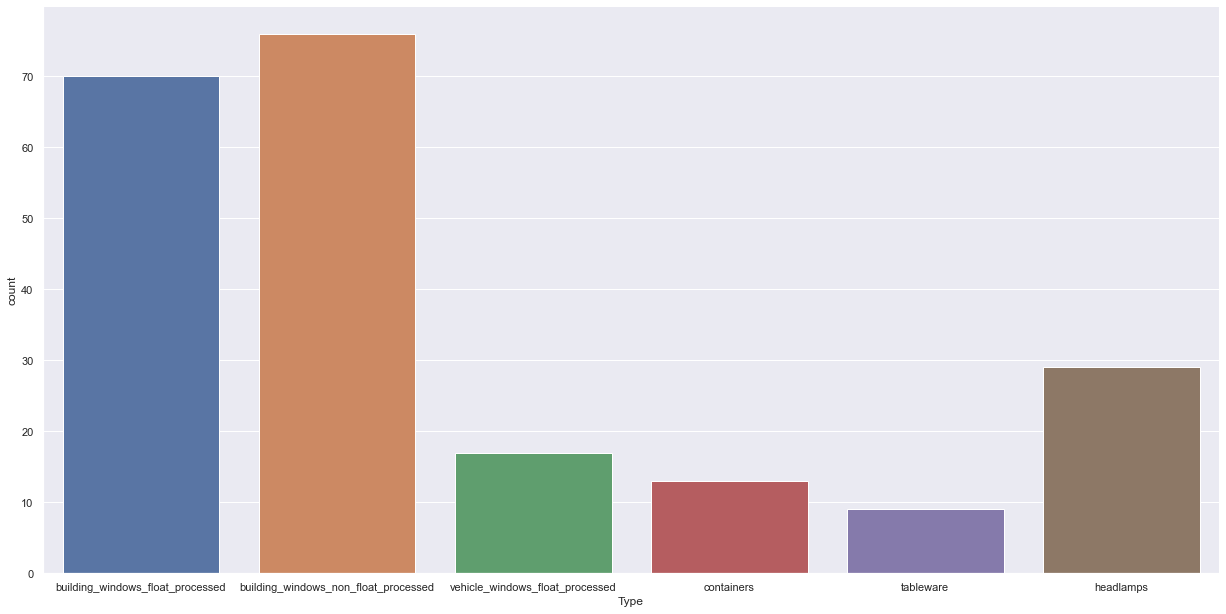

In [14]:
sns.factorplot('Type', data= glass_data1, kind="count", size=8.5,aspect=2)

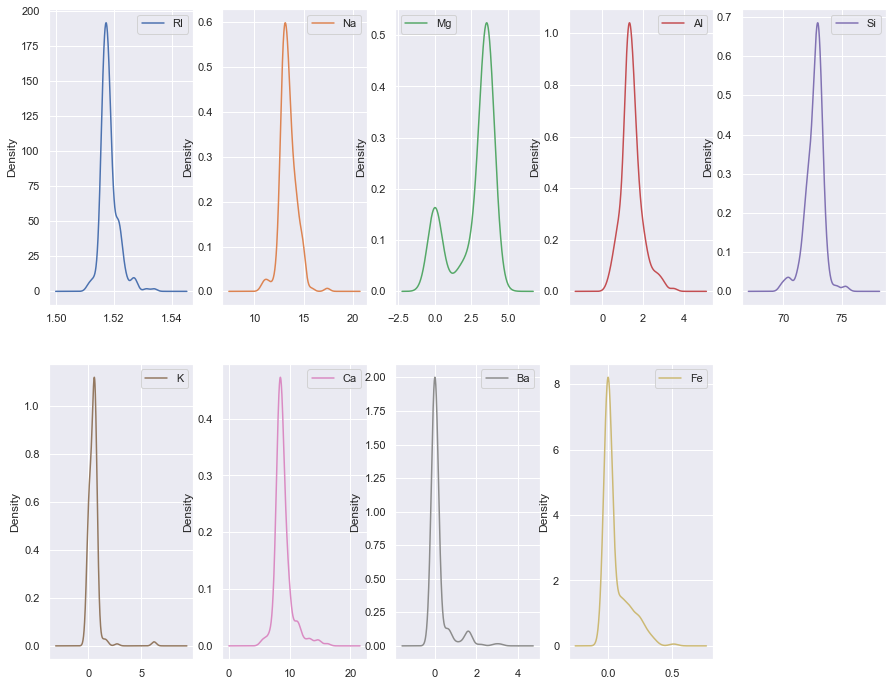

In [19]:
glass_data1.plot(kind='density',subplots=True,layout=(4,5),figsize=(15,25),sharex=False,sharey=False)
plt.show()

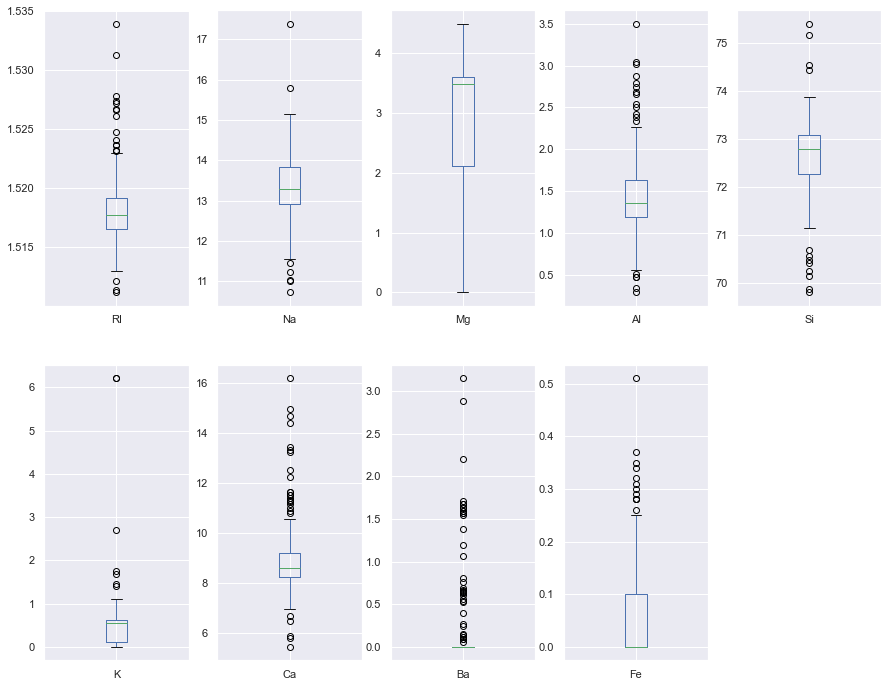

In [20]:
glass_data1.plot(kind='box',subplots=True,layout=(4,5),figsize=(15,25),sharex=False,sharey=False)
plt.show()

### 3.Finding correlation between the variables in the data

In [27]:
corr = glass_data1.corr(method='pearson')

In [28]:
corr.style.background_gradient(cmap='coolwarm')

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
RI,1.000000,-0.191885,-0.122274,-0.407326,-0.542052,-0.289833,0.810403,-0.000386,0.143010
Na,-0.191885,1.000000,-0.273732,0.156794,-0.069809,-0.266087,-0.275442,0.326603,-0.241346
Mg,-0.122274,-0.273732,1.000000,-0.481799,-0.165927,0.005396,-0.443750,-0.492262,0.083060
Al,-0.407326,0.156794,-0.481799,1.000000,-0.005524,0.325958,-0.259592,0.479404,-0.074402
Si,-0.542052,-0.069809,-0.165927,-0.005524,1.000000,-0.193331,-0.208732,-0.102151,-0.094201
K,-0.289833,-0.266087,0.005396,0.325958,-0.193331,1.000000,-0.317836,-0.042618,-0.007719
Ca,0.810403,-0.275442,-0.443750,-0.259592,-0.208732,-0.317836,1.000000,-0.112841,0.124968
Ba,-0.000386,0.326603,-0.492262,0.479404,-0.102151,-0.042618,-0.112841,1.000000,-0.058692
Fe,0.143010,-0.241346,0.083060,-0.074402,-0.094201,-0.007719,0.124968,-0.058692,1.000000


### As seen in the above, there is a high correlation exists between some of the variables. 
### We can use PCA (Principal Component Analysis) to reduce the high correlated variables

### 4.KNN
### 4.1 Finding optimal number of K

In [30]:
X = np.array(glass_data1.iloc[:,3:5])
y = np.array(glass_data1['Type'])

In [31]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=1,stratify=y)

In [34]:
k_values = np.arange(1,25)
train_accuracy=[]
test_accuracy =[]

In [36]:
for i, k in enumerate(k_values):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    train_accuracy.append(knn.score(X_train,y_train))
    test_accuracy.append(knn.score(X_test,y_test))

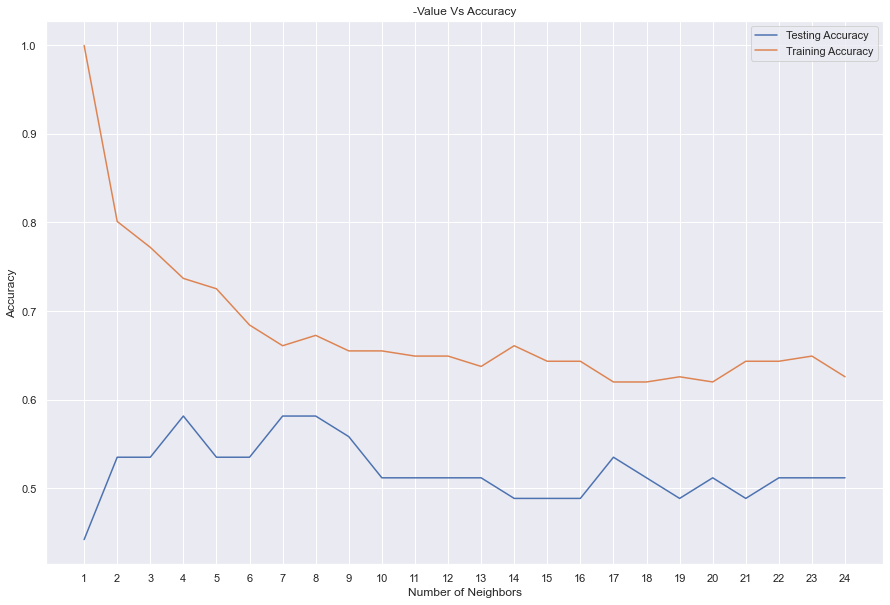

In [40]:
plt.figure(figsize=(15,10))
plt.plot(k_values, test_accuracy, label = 'Testing Accuracy')
plt.plot(k_values, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.title('-Value Vs Accuracy')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.show()

### we can see that k=4 produces the most accurate results

### 4.2 Applying the algorithm

In [44]:
knn = KNeighborsClassifier(n_neighbors=4)

In [47]:
knn.fit(X_train,y_train)
y_pred_KNeighborsClassifier = knn.predict(X_test)

In [48]:
scores = []
cv_scores = []

In [49]:
score = accuracy_score(y_pred_KNeighborsClassifier,y_test)
scores.append(score)

In [50]:
score_knn = cross_val_score(knn, X,y, cv=10)

In [51]:
print('Score_KNN_Mean:',score_knn.mean())
print('Score_KNN_STD:',score_knn.std()*2)

Score_KNN_Mean: 0.6127705627705629
Score_KNN_STD: 0.23547117559816877


In [53]:
cv_score = score_knn.mean()
cv_scores.append(cv_score)

In [54]:
cv_scores

[0.6127705627705629]

### 5.Conclusion

### KNN Accuracy: 0.61 (+/- 0.23)¶